In [1]:
import boto3
from src.utils.file_utils import read_all_rtf_in_dir, filter_open_file_and_machining
from src.utils.time_utils import (
    add_time_info_columns, group_timestamps_to_dataframe, compute_total_time,
    group_by_date, first_occurrence_per_date, summarize_by_date_and_shift,
    print_day_night_analysis
)
from src.utils.plot_utils import plot_daily, plot_time, plot_time_usage
from src.data.cleaner import filter_by_message_and_extract, filter_by_message_and_extract2

session = boto3.Session(profile_name='kubeprofile', region_name= 'us-east-1')

##  ANALISIS    ##

In [2]:
# Call the function 'read_all_rtf_in_dir'. It reads RTF files from a given directory (the first argument),
# saves the output DataFrame in the specified folder (the second argument).
# If the save file already exists, it does not replace it (since 'replace_flag' is False)

month = 6
year = 2025
import os
from pathlib import Path

# Get the project root directory (go up one level from the notebook directory)
project_root = Path(os.getcwd()).resolve().parent.parent
logs_dir = os.path.join(project_root, 'data', 'raw', 'logs')
processed_dir = os.path.join(project_root, 'data', 'processed')

original_df = read_all_rtf_in_dir(
    directory_path = logs_dir,
    save_folder = processed_dir,
    month = month, year = year)
final_df = filter_by_message_and_extract(original_df)
final_df

No new files to process.


,Timestamp,Message,machining_seconds
1420,2025-06-17 10:31:53,Total machining: 2.08 s,2.08
1489,2025-06-17 10:32:03,Total machining: 2.43 s,2.43
1570,2025-06-17 10:32:52,Total machining: 24.72 s,24.72
2068,2025-06-17 10:45:31,Total machining: 25.55 s,25.55
2215,2025-06-17 10:47:02,Total machining: 2.92 s,2.92
...,...,...,...
1032514,2025-06-28 13:35:25,Total machining: 104.67 s,104.67
1032744,2025-06-28 13:44:02,Total machining: 500.86 s,500.86
1033425,2025-06-28 14:09:26,Total machining: 1486.01 s,1486.01
1033964,2025-06-28 14:28:24,Total machining: 1103.89 s,1103.89


In [3]:
# Filter DataFrame to keep only rows where Message contains 'Open File:' or 'Total machining',
# Ppir each 'Total machining' with its corresponding 'Open File', and extract program name and time
original_df_filer = filter_open_file_and_machining(original_df)
original_df_filer

,Timestamp,Message,Turno,Year,Month,Day,CurrentFile,Programa,Tiempo
267798,2025-06-01 21:52:18,Total machining: 8.69 s,N,2025,6,1,None,NaN,8.69
267873,2025-06-01 21:52:31,Total machining: 5.53 s,N,2025,6,1,None,NaN,5.53
268063,2025-06-01 21:53:58,Total machining: 81.37 s,N,2025,6,1,None,NaN,81.37
268181,2025-06-01 22:09:39,Total machining: 86.47 s,N,2025,6,1,None,NaN,86.47
268212,2025-06-01 22:14:23,Total machining: 3.89 s,N,2025,6,1,None,NaN,3.89
...,...,...,...,...,...,...,...,...,...
1032514,2025-06-28 13:35:25,Total machining: 104.67 s,D,2025,6,28,Open File: C:\\Users\\CypTronic_Pro\\Desktop\...,L_01109.NC,104.67
1032744,2025-06-28 13:44:02,Total machining: 500.86 s,D,2025,6,28,Open File: C:\\Users\\CypTronic_Pro\\Desktop\...,L_01109.NC,500.86
1033425,2025-06-28 14:09:26,Total machining: 1486.01 s,D,2025,6,28,Open File: C:\\Users\\CypTronic_Pro\\Desktop\...,L_01109.NC,1486.01
1033964,2025-06-28 14:28:24,Total machining: 1103.89 s,D,2025,6,28,Open File: C:\\Users\\CypTronic_Pro\\Desktop\...,L_01109.NC,1103.89


In [4]:
hours_by_shift, total_dict = summarize_by_date_and_shift(original_df_filer)
hours_by_shift

{'2025-06-01': {'day': 0, 'night': 4289},
 '2025-06-02': {'day': 43300, 'night': 13057},
 '2025-06-03': {'day': 43470, 'night': 13289},
 '2025-06-04': {'day': 36402, 'night': 15459},
 '2025-06-05': {'day': 31419, 'night': 7092},
 '2025-06-06': {'day': 13774, 'night': 2969},
 '2025-06-07': {'day': 11103, 'night': 0},
 '2025-06-08': {'day': 0, 'night': 2566},
 '2025-06-09': {'day': 6176, 'night': 2713},
 '2025-06-10': {'day': 24899, 'night': 4824},
 '2025-06-11': {'day': 31900, 'night': 3535},
 '2025-06-12': {'day': 34625, 'night': 15497},
 '2025-06-13': {'day': 12091, 'night': 11314},
 '2025-06-14': {'day': 10327, 'night': 0},
 '2025-06-15': {'day': 0, 'night': 1028},
 '2025-06-16': {'day': 21152, 'night': 9343},
 '2025-06-17': {'day': 30086, 'night': 13579},
 '2025-06-18': {'day': 23264, 'night': 8937},
 '2025-06-19': {'day': 23449, 'night': 12153},
 '2025-06-21': {'day': 1592, 'night': 0},
 '2025-06-22': {'day': 0, 'night': 3350},
 '2025-06-23': {'day': 10985, 'night': 8479},
 '2025-0

In [5]:
total_dict

{'day': 448579, 'night': 165678}

In [6]:
# This function analyzes and prints a detailed comparison of day and night shift machine usage times. It:
# Takes a dictionary with 'day' and 'night' keys containing time values in seconds
# Calculates the total machine time and the ratio between night and day usage
# Converts seconds to hours for difference calculations and to hours/minutes/seconds format for display
# Calculates percentage distribution of time between day and night shifts
# Provides an interpretive explanation of the ratio based on predefined thresholds:
# No night work
# Day shift dominance (>2x night shift)
# Day shift higher production
# Similar production levels
# Night shift higher production
# Night shift dominance (>2x day shift)
# Prints a formatted summary showing:
# Day shift hours (7:00-21:00) with percentage
# Night shift hours (21:00-7:00) with percentage
# Total machining time
# Night-to-day ratio
# A human-readable interpretation of the production balance with hour differences
# The function helps analyze production patterns and shift efficiency by providing both numerical data and contextual interpretation.



print_day_night_analysis(total_dict)

Day shift (7:00-21:00): 124h 36m 19s (73.0% of total)
Night shift (21:00-7:00): 46h 1m 18s (27.0% of total)
Total machining time: 170h 37m 37s
Night-to-day ratio: 0.37
Interpretation: Day shift dominates production by 78.6 hours (more than 2x night shift)


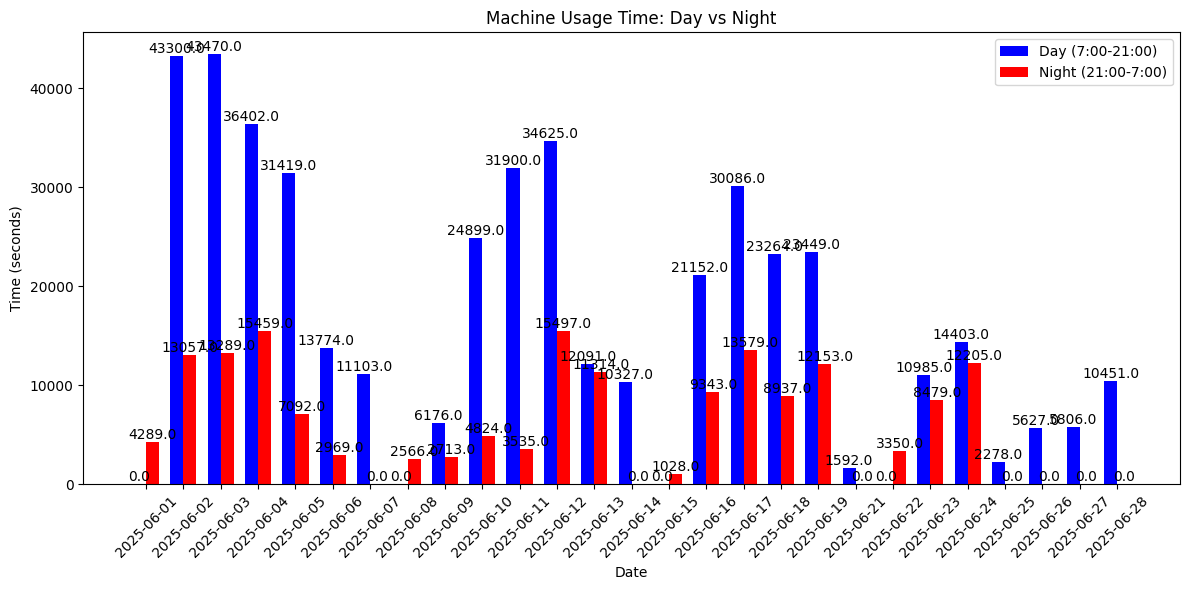

In [7]:
# This function plot_time_usage creates a bar chart comparing machine usage time during day and night periods across multiple dates. It:
# Takes a dictionary (time_dict) where keys are dates and values are nested dictionaries with 'day' and 'night' usage times
# Extracts the dates and corresponding day/night usage values into separate lists
# Creates a figure with side-by-side blue and red bars representing day and night usage respectively
# Diplays the dates on the x-axis (rotated 45 degrees for better readability)
# Labels the axes and adds a title describing the visualization
# Adds numeric labels on top of each bar showing the exact usage values
# Includes a legend to distinguish between day and night data
# Adjusts the layout to ensure all elements fit properly before displaying the chart
# The visualization allows for easy comparison of machine utilization patterns between daytime and nighttime operations across different dates.

plot_time_usage(hours_by_shift)

In [8]:
# Usage
drop_programas = ['CORTE ESPECIAL.slp', 'autosave.slp']
grouped_timestamps_df = group_timestamps_to_dataframe(final_df,
                                                      drop_programas)
# Display the DataFrame
grouped_timestamps_df = add_time_info_columns(grouped_timestamps_df)

In [9]:
grouped_timestamps_df

,Programa,Date,Timestamps,TM,Start Time,End Time,Steps,TiempoCorte,TiempoEspera
0,Default Program,2025-06-17,"[2025-06-17 10:31:53, 2025-06-17 10:32:03, 202...",0,2025-06-17 10:31:53,2025-06-17 23:41:30,180,47377.0,292019.0
1,Default Program,2025-06-21,"[2025-06-21 08:48:29, 2025-06-21 08:49:04, 202...",0,2025-06-21 08:48:29,2025-06-21 12:36:31,56,13682.0,-965249.0
2,Default Program,2025-06-10,"[2025-06-10 08:29:02, 2025-06-10 08:30:49, 202...",0,2025-06-10 08:29:02,2025-06-10 23:38:08,198,54546.0,-758647.0
3,Default Program,2025-06-02,"[2025-06-02 04:54:01, 2025-06-02 04:59:53, 202...",0,2025-06-02 04:54:01,2025-06-02 02:38:07,46,-8154.0,79001.0
4,Default Program,2025-06-03,"[2025-06-03 00:34:48, 2025-06-03 01:04:04, 202...",0,2025-06-03 00:34:48,2025-06-03 23:20:26,154,81938.0,1334250.0
5,Default Program,2025-06-19,"[2025-06-19 09:57:56, 2025-06-19 10:23:21, 202...",0,2025-06-19 09:57:56,2025-06-19 16:23:56,101,23160.0,-927208.0
6,Default Program,2025-06-08,"[2025-06-08 22:50:28, 2025-06-08 22:50:44, 202...",0,2025-06-08 22:50:28,2025-06-08 23:45:39,16,3311.0,4297.0
7,Default Program,2025-06-09,"[2025-06-09 00:57:16, 2025-06-09 01:01:12, 202...",0,2025-06-09 00:57:16,2025-06-09 23:26:23,94,80947.0,1170399.0
8,Default Program,2025-06-23,"[2025-06-23 12:33:02, 2025-06-23 12:37:03, 202...",0,2025-06-23 12:33:02,2025-06-23 10:34:26,101,-7116.0,50882.0
9,Default Program,2025-06-24,"[2025-06-24 00:42:28, 2025-06-24 00:43:58, 202...",0,2025-06-24 00:42:28,2025-06-24 16:29:15,149,56807.0,-1967817.0


## Tiempo en el df

In [10]:
grouped_df = group_by_date(original_df)
grouped_df.to_excel(os.path.join(processed_dir, "tiempo_por_dia.xlsx"), index=False)
df_first_occurrence = first_occurrence_per_date(original_df, 'Message', 'Layer: 1')
tiempo_df  = compute_total_time(original_df)

Month: 6, Total Hours: 170.63


## Graficas

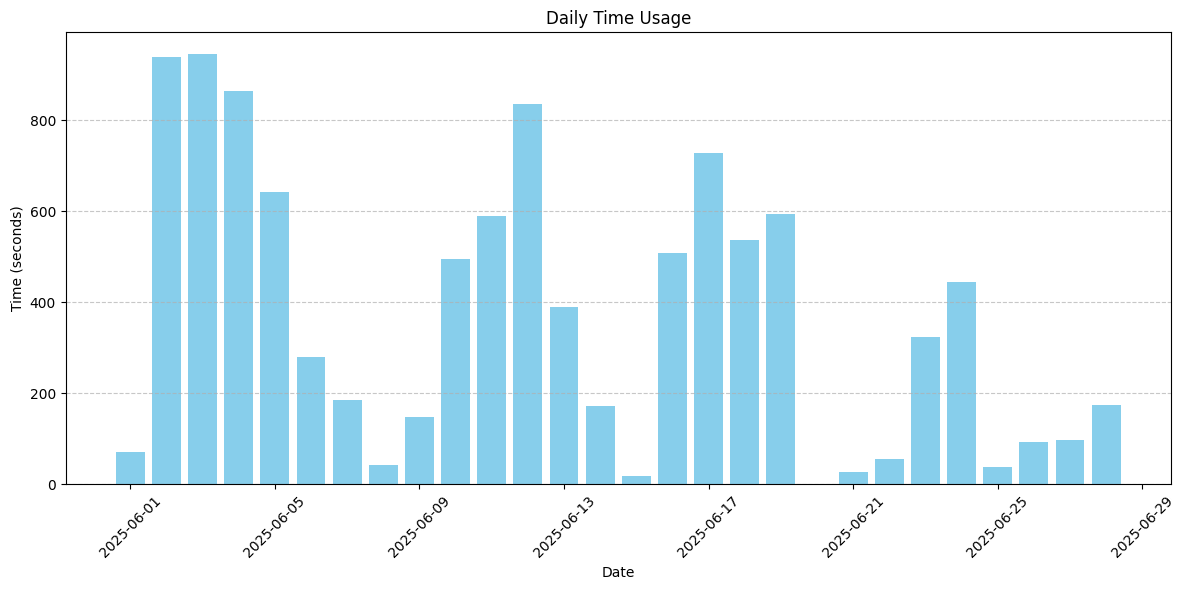

In [11]:
# Usage example
plot_daily(grouped_df, 'Date', 'Time')

In [12]:
plot_time(df_first_occurrence)

KeyError: 'Timestamp'

<Figure size 1200x600 with 0 Axes>

# Programas cortados

In [ ]:
# Get current date
# Get the current month and year
from src.visualization.program_plots import create_barplot
import datetime

now = datetime.datetime.now()
current_month = now.month
current_year = now.year

total_machining_df = filter_by_message_and_extract2(original_df)
total_machining_df.to_excel(os.path.join(processed_dir, f'tiempo_{current_year}_{current_month}.xlsx'))
total_machining_df

In [ ]:
# Usage
create_barplot(
    df=total_machining_df,
    x_col='program',
    y_col='total_machining',
    a=20, b=10, width=0.5,
    text_size=10, text_angle=65, text_color="red",
    x_title="Nombre del Programa", y_title="Tiempo de Corte (min)"
)

# Hora/Velocidad


We compare the previos df with the one populted manually and add the values that are not on the column program

In [ ]:
from hora_velocidad_corte import *
import pandas as pd

tf_path = "/Users/joserubio/Desktop/proyectos/Kupfer/Casos/jamesKupfer/data_final/tiempo_final.xlsx"

# Load spreadsheet into pandas DataFrame
tiempo_total_df = pd.read_excel(tf_path)

values_list = ['02552.NC', 'CORTE ESPECIAL.slp', 'value3', 'L_03896.NC', 'L_04009.NC', 'Peineta mesa.slp', 'choki cuadrado.slp', 'espatula.slp', 'pieza sold.slp',
               '55531355-perforaciones placa izquierda.slp', 'autosave.slp', 'Boquillas.slp','03859.slp', 'L_04007.NC', '300 500.slp', 'L_05628.NC', 'pv 55572952.slp',
               'runner.slp', 'Parra.slp', 'pas.slp', 'PARRILLA LEO.slp', 'AXB 25x1747x76.slp', 'PARRILLA LEO 02.slp', '021975.NC', '023116-1.slp', 'prueba parrilla nueva.slp','prueba parrilla nueva.slp', '55672699 PROBETA 25.slp', '100x200 bisel.slp', '100x200 bisel copy.slp', '6000X(100)X10 6000x40x10.slp']

# Merge 'tiempo_total_df' with 'total_machining_df' on 'program' column
merged_df = merge_dataframes(tiempo_total_df,
                             total_machining_df,
                             'program',
                             'total_machining',
                             values_list)

# Export to Excel, ensuring the date format
merged_df.to_excel(os.path.join(processed_dir, "por_llenar_final.xlsx"), index=False)

In [ ]:
# group the DataFrame by 'Espesor' column and sum 'Programas cortados' column then reset index
output_df = group_and_sum(tiempo_total_df, 'Espesor', 'Programas cortados')

# apply transformations to the DataFrame
df_reset = transform_data(tiempo_total_df)

# merge the transformed DataFrame with the grouped and summed DataFrame on 'Espesor' column
df_reset = pd.merge(output_df, df_reset, on='Espesor')

# preview the first 5 rows of the final DataFrame
df_reset

In [ ]:
def get_all_items_from_table(table_name):
    dynamo = boto3.resource('dynamodb', region_name='us-east-1')
    table = dynamo.Table(table_name)

    response = table.scan()
    items = response['Items']
    while 'LastEvaluatedKey' in response:
        response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
        items.extend(response['Items'])

    return items

In [ ]:
laser_close = get_all_items_from_table('sam-stack-irlaa-LaserClosedTable-6CR5UN27N92Y')

In [ ]:
laser_close_df = pd.DataFrame(laser_close)
laser_close_df.tail()

In [ ]:
def update_missing_values(merged_df, laser_close_df):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    merged_df = merged_df.copy()

    # Create a clean program column for matching - remove .NC and leading zeros
    merged_df['program_clean'] = merged_df['program'].str.replace('.NC', '', case=False)
    merged_df['program_clean'] = merged_df['program_clean'].str.lstrip('0')

    # Create normalized version of cnc column in laser_close_df
    laser_close_df = laser_close_df.copy()
    laser_close_df['cnc_clean'] = laser_close_df['cnc'].astype(str).str.lstrip('0')

    # Convert Decimal values to float in laser_close_df
    laser_close_df['metros'] = laser_close_df['metros'].astype(float)
    laser_close_df['espesor'] = laser_close_df['espesor'].astype(float)

    # Create mapping dictionaries from laser_close_df with normalized keys
    metros_map = dict(zip(laser_close_df['cnc_clean'], laser_close_df['metros']))
    espesor_map = dict(zip(laser_close_df['cnc_clean'], laser_close_df['espesor']))

    # Find rows with NaN values
    nan_mask = merged_df[['Longitude Corte (m)', 'Espesor']].isna().any(axis=1)

    # Update values where matches exist
    merged_df.loc[nan_mask, 'Longitude Corte (m)'] = (
        merged_df.loc[nan_mask, 'program_clean']
        .map(metros_map)
        .astype(float)
    )

    merged_df.loc[nan_mask, 'Espesor'] = (
        merged_df.loc[nan_mask, 'program_clean']
        .map(espesor_map)
        .astype(float)
    )

    # Remove rows where no match was found (values remained NaN)
    merged_df = merged_df.dropna(subset=['Longitude Corte (m)', 'Espesor'])

    # Remove the temporary clean program column
    merged_df = merged_df.drop('program_clean', axis=1)

    return merged_df



In [ ]:
new_df = update_missing_values(merged_df, laser_close_df)
new_df.to_excel(os.path.join(processed_dir, "tiempo_final.xlsx"), index=False)
new_df.to_excel(os.path.join(processed_dir, "por_llenar_final.xlsx"), index=False)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def detect_outliers_regression(df, threshold=3):
    """
    Detect outliers using linear regression with studentized residuals

    Args:
        df: DataFrame with 'Longitude Corte (m)', 'Espesor', 'total_machining'
        threshold: Number of standard deviations to consider as outlier (default=3)

    Returns:
        outliers_mask: Boolean series indicating outliers
        diagnostics: Dictionary with additional information
    """
    # Create feature matrix X and target variable y
    X = df[['Longitude Corte (m)', 'Espesor']]
    y = df['total_machining']

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Get predictions
    y_pred = model.predict(X)

    # Calculate residuals
    residuals = y - y_pred

    # Calculate studentized residuals
    n = len(df)
    X_with_intercept = np.column_stack([np.ones(n), X])
    mse = np.sum(residuals**2) / (n - 3)  # n-3 because we have 2 predictors plus intercept
    h = np.diagonal(X_with_intercept.dot(np.linalg.inv(X_with_intercept.T.dot(X_with_intercept))).dot(X_with_intercept.T))
    studentized_residuals = residuals / np.sqrt(mse * (1 - h))

    # Flag as outlier if studentized residual is > threshold or < -threshold
    outliers_mask = abs(studentized_residuals) > threshold

    # Create diagnostics dictionary
    diagnostics = {
        'studentized_residuals': studentized_residuals,
        'predicted_values': y_pred,
        'actual_values': y,
        'leverage': h,
        'model_coefficients': {
            'Longitude Corte (m)': model.coef_[0],
            'Espesor': model.coef_[1],
            'intercept': model.intercept_
        }
    }

    # Print summary
    print(f"Number of outliers detected: {outliers_mask.sum()}")
    print(f"Percentage of outliers: {(outliers_mask.sum()/len(df))*100:.2f}%")
    print("\nModel coefficients:")
    print(f"Longitude Corte (m): {model.coef_[0]:.4f}")
    print(f"Espesor: {model.coef_[1]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    return outliers_mask, diagnostics

def plot_outliers_detailed(df, outliers_mask, diagnostics):
    """
    Create detailed plots to visualize the outliers and model fit
    """
    fig = plt.figure(figsize=(15, 10))

    # Plot 1: Actual vs Predicted
    ax1 = fig.add_subplot(221)
    ax1.scatter(diagnostics['predicted_values'][~outliers_mask],
                df['total_machining'][~outliers_mask],
                alpha=0.5, label='Normal')
    ax1.scatter(diagnostics['predicted_values'][outliers_mask],
                df['total_machining'][outliers_mask],
                color='red', alpha=0.7, label='Outlier')
    ax1.plot([df['total_machining'].min(), df['total_machining'].max()],
             [df['total_machining'].min(), df['total_machining'].max()],
             'k--', label='Perfect Prediction')
    ax1.set_xlabel('Predicted Machining Time')
    ax1.set_ylabel('Actual Machining Time')
    ax1.legend()
    ax1.set_title('Actual vs Predicted Machining Time')

    # Plot 2: Studentized Residuals vs Predicted
    ax2 = fig.add_subplot(222)
    ax2.scatter(diagnostics['predicted_values'][~outliers_mask],
                diagnostics['studentized_residuals'][~outliers_mask],
                alpha=0.5, label='Normal')
    ax2.scatter(diagnostics['predicted_values'][outliers_mask],
                diagnostics['studentized_residuals'][outliers_mask],
                color='red', alpha=0.7, label='Outlier')
    ax2.axhline(y=0, color='k', linestyle='--')
    ax2.axhline(y=3, color='r', linestyle='--')
    ax2.axhline(y=-3, color='r', linestyle='--')
    ax2.set_xlabel('Predicted Machining Time')
    ax2.set_ylabel('Studentized Residuals')
    ax2.legend()
    ax2.set_title('Studentized Residuals vs Predicted')

    # Plot 3: 3D visualization
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter(df[~outliers_mask]['Longitude Corte (m)'],
                df[~outliers_mask]['Espesor'],
                df[~outliers_mask]['total_machining'],
                alpha=0.5, label='Normal')
    ax3.scatter(df[outliers_mask]['Longitude Corte (m)'],
                df[outliers_mask]['Espesor'],
                df[outliers_mask]['total_machining'],
                color='red', alpha=0.7, label='Outlier')
    ax3.set_xlabel('Longitude Corte (m)')
    ax3.set_ylabel('Espesor')
    ax3.set_zlabel('Total Machining')
    ax3.legend()
    ax3.set_title('3D Visualization')

    # Plot 4: Leverage vs Studentized Residuals
    ax4 = fig.add_subplot(224)
    ax4.scatter(diagnostics['leverage'][~outliers_mask],
                diagnostics['studentized_residuals'][~outliers_mask],
                alpha=0.5, label='Normal')
    ax4.scatter(diagnostics['leverage'][outliers_mask],
                diagnostics['studentized_residuals'][outliers_mask],
                color='red', alpha=0.7, label='Outlier')
    ax4.axhline(y=0, color='k', linestyle='--')
    ax4.set_xlabel('Leverage')
    ax4.set_ylabel('Studentized Residuals')
    ax4.legend()
    ax4.set_title('Leverage vs Studentized Residuals')

    plt.tight_layout()
    plt.show()

# Use the functions
outliers_mask, diagnostics = detect_outliers_regression(new_df)
plot_outliers_detailed(new_df, outliers_mask, diagnostics)


In [ ]:
# If you want to keep only the clean data (removing outliers):
df_clean = new_df[~outliers_mask].copy()
df_clean.to_excel(os.path.join(processed_dir, "clean_tiempo_final.xlsx"), index=False)
# Or if you want to keep all data but have the outlier flag:
df_clean = new_df.copy()

In [ ]:
create_plots(df_reset)

In [ ]:
# Save to Excel with the new filename in the same folder
output_path = "/Users/joserubio/Desktop/proyectos/Kupfer/Casos/jamesKupfer/data_final/tiempo_final.xlsx"
output_path_df = pd.read_excel(output_path)
output_path_df

In [ ]:
# Usage:
averages = average_time_aws("./data_original_logs")
velocity_month = velocity_aws("./data_final/tiempo_final.xlsx", 'total_machining')

average_values = {}
average_values['average_time_aws'] = averages
average_values['velocity_month'] = velocity_month
print(average_values)


In [ ]:
average_values['velocity_month']

In [ ]:
def plot_data(data):
    # Flatten and organize data
    flattened_data = []
    for month, espesors in data.items():
        for espesor, velocity in espesors.items():
            if velocity > 0:
                flattened_data.append((month, int(espesor), velocity))

    # Group data by espesor
    espesor_data = {}
    for month, espesor, velocity in flattened_data:
        if espesor not in espesor_data:
            espesor_data[espesor] = []
        espesor_data[espesor].append((month, velocity))

    # Sort espesors and prepare for plotting
    unique_espesors = sorted(espesor_data.keys())
    num_espesors = len(unique_espesors)
    num_rows = math.ceil(num_espesors / 3)

    # Set up figure with clean white background
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'DejaVu Serif'],
        'axes.labelsize': 11,
        'axes.titlesize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'axes.spines.top': False,
        'axes.spines.right': False,
    })

    fig, axs = plt.subplots(num_rows, 3, figsize=(16, num_rows * 4),
                           facecolor='white', squeeze=False)

    # Harvard-style color palette (muted blues and reds)
    base_colors = ['#8C1515', '#0F4D92', '#2E6B34', '#6E3667', '#A79B2E', '#175E54']
    colors = [base_colors[i % len(base_colors)] for i in range(len(unique_espesors))]

    # Plot each espesor in its own subplot
    for i, espesor in enumerate(unique_espesors):
        row, col = divmod(i, 3)
        ax = axs[row, col]

        # Sort data by month for this espesor
        month_data = sorted(espesor_data[espesor])
        if not month_data:
            continue

        months = [m.replace('2024_', '').capitalize() for m, _ in month_data]
        velocities = [v for _, v in month_data]

        # Create bar chart with Harvard-style aesthetics
        bars = ax.bar(range(len(months)), velocities, color=colors[i],
                     edgecolor='black', linewidth=0.8, width=0.7)

        # Add labels with academic formatting
        ax.set_title(f'Espesor: {espesor}', fontweight='bold')
        ax.set_xlabel('Month')
        ax.set_ylabel('Velocity (units)')
        ax.set_xticks(range(len(months)))
        ax.set_xticklabels(months, rotation=45, ha='right')

        # Set y-axis to start from 0
        max_velocity = max(velocities) if velocities else 0
        ax.set_ylim(bottom=0, top=max_velocity * 1.15)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.01 * max_velocity,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=9)

        # Add subtle grid lines only on the y-axis
        ax.yaxis.grid(True, linestyle='-', alpha=0.2, color='gray')
        ax.set_axisbelow(True)

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Thicken bottom and left spines
        ax.spines['bottom'].set_linewidth(1.2)
        ax.spines['left'].set_linewidth(1.2)

    # Remove unused subplots
    for i in range(num_espesors, num_rows * 3):
        row, col = divmod(i, 3)
        if row < len(axs) and col < len(axs[0]):
            fig.delaxes(axs[row, col])

    # Adjust layout
    plt.tight_layout(pad=2.5)

    # Add a main title with Harvard-style formatting
    fig.suptitle('Velocity Analysis by Material Thickness',
                fontsize=14, fontweight='bold', y=0.98,
                fontfamily='serif')

    # Add a subtle footer with citation information
    plt.figtext(0.5, 0.01, 'Source: Experimental Data, 2024',
               ha='center', fontsize=9, fontstyle='italic')

    plt.show()

plot_data(average_values['velocity_month'])

In [ ]:
def average_dict_values(data_dict):
    # A dictionary to keep track of total sum
    result = defaultdict(float)

    # A dictionary to keep track of count
    count = defaultdict(int)

    # Iterate over each dictionary
    for outer_key, inner_data in data_dict.items():
        for inner_key, values in inner_data.items():
            result[inner_key] += values
            count[inner_key] += 1

    # Calculate the average and round it to 2 decimal places:
    average_dict = {key: round(total / count[key], 2) for key, total in result.items()}

    return average_dict

In [ ]:
averages = average_dict_values(average_values['velocity_month'])
print(averages)

In [ ]:
import boto3
from decimal import Decimal
from boto3.dynamodb.types import TypeSerializer


def float_to_decimal(float_value):
    """Convert a floating point value to a decimal that DynamoDB can store."""
    return Decimal(str(float_value))

def serialize_data(data):  # New helper function
    if isinstance(data, list):  # If the data is a list
        return [serialize_data(x) for x in data]
    elif isinstance(data, dict):  # If the data is a dictionary
        return {k: serialize_data(v) for k, v in data.items()}
    elif isinstance(data, float):  # If the data is a float
        return float_to_decimal(data)
    else:
        return data

def chunk(items, batch_size):
    """Function to divide items into chunks for batch write."""
    for i in range(0, len(items), batch_size):
        yield items[i:i + batch_size]

def upload_items_to_dynamodb(table_name, items):
    dynamodb = session.client('dynamodb', region_name='us-east-1')
    serializer = TypeSerializer()

    for batch in chunk(list(items.items()), 25):
        formatted_requests = []
        for key, value in batch:
            formatted_item = {k: serializer.serialize(v) for k, v in {"key": key, "details": serialize_data(value)}.items()}

            formatted_requests.append({
                'PutRequest': {
                    'Item': formatted_item
                }
            })

        response = dynamodb.batch_write_item(RequestItems={table_name: formatted_requests})

        while response.get('UnprocessedItems', {}):
            response = dynamodb.batch_write_item(RequestItems=response['UnprocessedItems'])


# Usage:
average_values_kupfer = 'AVERAGE_VALUE-dev'
upload_items_to_dynamodb(average_values_kupfer, average_values) # here to not update the table.

In [ ]:

def list_tables():
    dynamodb = session.client('dynamodb', region_name= 'us-east-1')
    response = dynamodb.list_tables()
    return response['TableNames']

print(list_tables())

## Importing the data from the table to calculate the velocity from table.

In [ ]:
dynamo = session.resource('dynamodb', region_name= 'us-east-1')
table_averages = dynamo.Table(average_values_kupfer)
response_averages = table_averages.scan()

items_averages = response_averages['Items']

In [ ]:
from typing import Dict, Union
from collections import defaultdict
from decimal import Decimal
def average_dict_values(data_dict: Dict[str, Dict[str, Union[float, Decimal]]]) -> Dict[str, Decimal]:
    result = defaultdict(float)
    count = defaultdict(int)

    for outer_key, inner_data in data_dict.items():
        for inner_key, values in inner_data.items():
            result[inner_key] += float(values)
            count[inner_key] += 1

    # Calculate the average and round it to 2 decimal places:
    return {k: round(result[k] / count[k], 2) for k in result}

In [ ]:

averages_ss = average_dict_values(items_averages[0]['details'])
print(averages_ss)

## Importing datos from laser close

In [ ]:
import boto3

table = dynamo.Table('LASER_CLOSE_VALUE-dev')

response = table.scan()

items = response['Items']

while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    items.extend(response['Items'])

print(items)

In [ ]:
# Tabla del futuro
table_futuro = dynamo.Table('LASER_UPLOAD-dev')
response_futuro = table_futuro.scan()
items_futuro = response_futuro['Items']

while 'LastEvaluatedKey' in response_futuro:
    response_futuro = table_futuro.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    items_futuro.extend(response_futuro['Items'])

print(items_futuro)

In [ ]:
def calculate_tiempo_corte(data, averages):
    for item in data:
        print(item)
        espesor_avg = averages.get(str(item['espesor']))  # convert Decimal to string
        if espesor_avg is not None:
            item['tiempo_corte'] = round(float(item['metros'])/espesor_avg, 2)  # convert Decimal to float and round to 2 decimal places
    return data

new_data = calculate_tiempo_corte(items, averages)

In [ ]:
new_data = calculate_tiempo_corte(items_futuro, averages)

In [ ]:
for each in items_futuro:
    print(each)
    print( '=='*20 )

In [ ]:
for each in items:
    print(each)
    print( '=='*20 )

In [ ]:
from itertools import groupby
from operator import itemgetter

# Assuming your entries are stored in a list named 'data'
items.sort(key=itemgetter('pv'))

grouped_data = {}
for key, group in groupby(items, key=lambda x:x['pv']):
    grouped_data[key] = list(group)

# Now grouped_data contains entries grouped by 'pv'.

In [ ]:
# Assuming your entries are stored in a list named 'data'
items_futuro.sort(key=itemgetter('pv'))

grouped_data_futuro = {}
for key, group in groupby(items_futuro, key=lambda x:x['pv']):
    grouped_data_futuro[key] = list(group)

grouped_data_futuro

In [ ]:
for each in grouped_data_futuro:
    for each2 in grouped_data_futuro[each]:
        print(each2)
        print(each2['tiempo_corte'])

In [ ]:
grouped_data

In [ ]:
def sum_up_values(data):
    summed_data = {}
    for pv, items in data.items():
        total_kg = sum(float(item['kg']) for item in items)
        total_tiempo_corte = sum(item['tiempo_corte'] for item in items)

        summed_data[pv] = {
            'total_kg': round(total_kg, 2),
            'total_tiempo_corte': round(total_tiempo_corte, 2)
        }

    return summed_data
summed_data = sum_up_values(grouped_data)
summed_data

In [ ]:
summed_data_futuro = sum_up_values(grouped_data_futuro)
summed_data_futuro

In [ ]:
def plot_data(data, sort_by, num_per_plot=6):
    # Sort data by 'sort_by'
    sorted_data = dict(sorted(data.items(), key=lambda item: item[1][sort_by], reverse=True))

    # Split the data into chunks, with each containing 'num_per_plot' elements
    data_chunks = [dict(list(sorted_data.items())[i:i+num_per_plot]) for i in range(0, len(sorted_data), num_per_plot)]
    num_plots = len(data_chunks)

    # Calculate the number of rows and columns for subplots
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(3, num_plots)  # use 3 columns if num_plots > 3 else use num_plots

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

    if num_plots > 1:
        axs = axs.ravel()  # if multiple subplots, make axs a 1-D array

    for i, data in enumerate(data_chunks):
        pv_names = list(data.keys())
        total_kg_values = [item['total_kg'] for item in data.values()]
        total_tiempo_corte_values = [item['total_tiempo_corte'] for item in data.values()]

        x = np.arange(len(pv_names))  # the label locations
        width = 0.4  # the width of the bars

        ax = axs if num_plots == 1 else axs[i]
        rects1 = ax.bar(x - width/2, total_kg_values, width, label='Total KG', color='orange')
        rects2 = ax.bar(x + width/2, total_tiempo_corte_values, width, label='Total Tiempo Corte', color='skyblue')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_xlabel('PV Names')
        ax.set_ylabel('Total Values')
        ax.set_title('Total KG and Total Tiempo Corte by PV')
        ax.set_xticks(x)
        ax.set_xticklabels(pv_names)
        ax.legend()

        # Function to add value labels to the bars
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{:.1f}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

        autolabel(rects1)
        autolabel(rects2)

        # Turn on the grid
        ax.grid(True)

        plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

    fig.tight_layout()
    plt.show()

In [ ]:
# Usage:
plot_data(summed_data, 'total_kg')
# plot_data(summed_data, 'total_tiempo_corte')

In [ ]:
# plot_data(summed_data, 'total_kg')
plot_data(summed_data, 'total_tiempo_corte')

## Analisis de Costos


In [ ]:
# Definision de variables

costos_fijos = 10000000 #clp
costos_variables = 1000000 #clp
costos_variables_doble_turno = 1000000 #clp
horas_mes = 176
horas_efectivas = 44

In [ ]:
costo_total =  costos_fijos + costos_variables
costo_total_doble_turno = costo_total + costos_variables_doble_turno


costo_hora = round(costo_total/horas_mes, 2)
costo_efectivo = round(costo_total/horas_efectivas, 2)

costo_hora_doble_turno = round(costo_total_doble_turno/(2*horas_mes), 2)
costo_efectivo_doble_turno = round(costo_total_doble_turno/(2*horas_efectivas), 2)



pp = 'Costo total es: {} Clp'.format(costo_total)
pp6 = 'Costo total Doble turno es: {} Clp'.format(costo_total_doble_turno )
pp1 = 'Costo Hora es: {} Clp, considerando {}, horas'.format(costo_hora, horas_mes)
pp2 = 'Costo Hora Efectivo es: {} Clp, considerando {}, horas'.format(costo_efectivo, horas_efectivas)

pp3 = 'Costo Hora doble turno  es: {} Clp, considerando {}, horas'.format(costo_hora_doble_turno, 2*horas_mes)
pp4 = 'Costo Hora Efectiva doble turno es: {} Clp, considerando {}, horas'.format(costo_efectivo_doble_turno, 2*horas_efectivas)

print(pp)
print(pp6)
print('__'*20)
print(pp1)
print(pp2)
print('__'*20)
print(pp3)
print(pp4)


In [ ]:
summed_data

In [ ]:
def calculate_total_price(data: dict, kg_price: float, time_price: float) -> dict:
    new_data = {}
    for key, value in data.items():
        new_data[key] = {
            "total_kg": value["total_kg"],
            "total_tiempo_corte": value["total_tiempo_corte"],
            "precio_kg": round(value["total_kg"] * kg_price, 2),
            "precio_tiempo": round(value["total_tiempo_corte"] * time_price, 2)
        }
    return new_data

In [ ]:
precio_efectivo_minutos = costo_efectivo/60
precio_kg = 360
costos_data_futuro = calculate_total_price(summed_data_futuro, precio_kg, precio_efectivo_minutos)
costos_data_futuro

In [ ]:
# replace "your_data" with the variable containing your dictionary data.
# replace 10 and 5 with your actual kg_price and time_price values respectively.

costos_data = calculate_total_price(summed_data, precio_kg, precio_efectivo_minutos)
costos_data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_data(data, sort_by, y1, y2, num_per_plot=6):
    # Sort data by 'sort_by'
    sorted_data = dict(sorted(data.items(), key=lambda item: item[1][sort_by], reverse=True))

    # Split the data into chunks, with each containing 'num_per_plot' elements
    data_chunks = [dict(list(sorted_data.items())[i:i+num_per_plot]) for i in range(0, len(sorted_data), num_per_plot)]
    num_plots = len(data_chunks)

    # Define the number of rows and columns for subplots
    num_rows = math.ceil(num_plots / 3)
    num_cols = min(3, num_plots)  # use 3 columns if num_plots > 3 else use num_plots

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

    if num_plots > 1:
        axs = axs.ravel()  # if multiple subplots, make axs a 1-D array

    for i, data in enumerate(data_chunks):
        pv_names = list(data.keys())
        y1_values = [item[y1] for item in data.values()]
        y2_values = [item[y2] for item in data.values()]

        x = np.arange(len(pv_names))  # the label locations
        width = 0.4  # the width of the bars

        ax = axs if num_plots == 1 else axs[i]
        rects1 = ax.bar(x - width/2, y1_values, width, label=y1, color='orange')
        rects2 = ax.bar(x + width/2, y2_values, width, label=y2, color='skyblue')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_xlabel('PV Names')
        ax.set_ylabel('Precio')
        ax.set_title(f'{y1} and {y2} by PV')
        ax.set_xticks(x)
        ax.set_xticklabels(pv_names, rotation=45)
        ax.legend()

        # Function to add value labels to the bars
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{:.1f}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', rotation=90)

        autolabel(rects1)
        autolabel(rects2)

        # Turn on the grid
        ax.grid(True)

    fig.tight_layout()
    plt.xticks(rotation=90)
    plt.show()
# Usage:
plot_data(costos_data, 'precio_kg', 'precio_kg', 'precio_tiempo')
# plot_data(summed_data, 'total_tiempo_corte', 'total_kg', 'total_tiempo_corte')

In [ ]:
plot_data(costos_data, 'precio_tiempo', 'precio_kg', 'precio_tiempo')

In [ ]:
def sum_up(data, key):
    return sum(item[key] for item in data.values())

# Usage example:
total_kg_sum = sum_up(costos_data, 'precio_kg')

pp = "Cobro Total en funcion de Kg: {:.2f}".format(total_kg_sum)
print(pp)

In [ ]:
total_tiempo_sum = sum_up(costos_data, 'precio_tiempo')
pp = "Cobro Total en funcion de Tiempo: {:.2f}".format(total_tiempo_sum)
print(pp)

In [ ]:
pp = "Diferencia: {:.2f}".format(total_tiempo_sum - total_kg_sum)
print(pp)

In [ ]:
# import seaborn as sns
# import pandas as pd
#
# sns.set_theme(style="ticks")
#
# # Convert your data to DataFrame
# df = pd.DataFrame(costos_data).T
# df_reset = df.reset_index()
#
# # Then, rename the new column generated from the index.
# df_reset = df_reset.rename(columns = {'index':'pv'})
#
# # Create a Pairplot
# # sns.pairplot(df_reset)
#
# g = sns.pairplot(df_reset, diag_kind="kde", diag_kws={'warn_singular': False})
# g.map_lower(sns.kdeplot, levels=4, color=".2", warn_singular=False)
#
# plt.show()

In [ ]:
df = pd.DataFrame(costos_data).T
df_reset = df.reset_index()

# Then, rename the new column generated from the index.
df_reset = df_reset.rename(columns = {'index':'pv'})

df_kg = df_reset.sort_values(by='total_kg')

df_kg ['index_pv'] = df_kg .index

# If you want to sort it in descending order,
df_kg = df_kg.sort_values(by='precio_kg', ascending=False).reset_index(drop=True)
df_tiempo = df_kg.sort_values(by='precio_tiempo', ascending=False).reset_index(drop=True)
df_tiempo.rename(columns={'pv': 'pv2'}, inplace=True)
df_tiempo['index_pv1'] = df_tiempo.index
# Assuming the first dataframe is named df1 and the second is df2
merged_df = df_kg.join(df_tiempo, lsuffix='_df1', rsuffix='_df2')

merged_df = merged_df.drop(['total_kg_df1', 'total_tiempo_corte_df1', 'precio_kg_df1',
                            'precio_tiempo_df1', 'total_kg_df2', 'total_tiempo_corte_df2',
                            'precio_kg_df2', 'precio_tiempo_df2', 'pv2'], axis=1)

In [ ]:
# merged_df.columns

In [ ]:
# # assuming 'df' is your dataframe
# fig = px.parallel_categories(merged_df, dimensions=['pv', 'index_pv1', 'index_pv_df2'], labels={'index_pv1': "Posicion 1",
#                   'index_pv_df2': "Posicion 2"}, )
# fig.show()

## Perforado

In [ ]:
print(list_tables())


In [ ]:
table = dynamo.Table('MECANIZADO_UPLOAD-dev')

response = table.scan()

items_upload = response['Items']
print(items)


In [ ]:

table = dynamo.Table('MECANIZADO_CLOSE2-dev')

response = table.scan()

items = response['Items']
print(items)

while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    items.extend(response['Items'])

print(items)

In [ ]:
def extract_nested_values(data, keys):
    """
    Extract specific keys from a nested dictionary

    :param data: Dictionary from which to extract data.
    :param keys: List of keys to extract.
    :return: New dictionary with extracted key-value pairs.
    """
    extracted_data = {}

    for key in keys:
        if key in data:
            extracted_data[key] = data[key]
        elif 'data' in data and key in data['data']:
            extracted_data[key] = data['data'][key]

    return extracted_data


In [ ]:
# List of keys to extract
keys_to_extract = ['cantidadPlacas','tipoMecanizado', 'cliente', 'cantidadPerforacionesTotal','pv', 'timestamp', 'espesor', 'kg',
                   'cantidadPerforacionesPlacas', 'negocio', 'createdAt']
data_list = []


for num, item in enumerate(items):
    print(item)
    extracted_data = extract_nested_values(item, keys_to_extract)
    data_list.append(extracted_data)
    print(f'{num}\n{extracted_data}\n{"="*40}')

df_mecanizado = pd.DataFrame(data_list)

In [ ]:

date = '2024-12-31'
date1 = '2025-02-01'
# Filter DataFrame based on 'timestamp'
df_mecanizado = df_mecanizado[df_mecanizado['timestamp']>= date]
df_mecanizado = df_mecanizado[df_mecanizado['timestamp'] < date1]

df_mecanizado

In [ ]:
import pandas as pd
from decimal import Decimal

# Input date
date_filter = '2024-12-30'

# Initialize a list to hold the filtered results
filtered_results = []

# Iterate through each entry in the data list
for entry in items:
    # Ensure the entry is a dictionary
    if isinstance(entry, dict):
        created_at = entry.get('data', {}).get('createdAt')
        entry_date = created_at.split('T')[0] if created_at else None

        # Continue processing only if the createdAt date matches the filter date
        if entry_date and entry_date > date_filter:
            # Sum 'placas' values where 'origen' is 'Progreso'
            sum_placas_progreso = Decimal('0')
            for progress_entry in entry.get('data', {}).get('progress', []):
                if progress_entry.get('origen') == 'Progreso':
                    sum_placas_progreso += progress_entry.get('placas', Decimal('0'))

            # Compare summed 'placas' with 'cantidadPlacas'
            cantidad_placas = entry.get('data', {}).get('cantidadPlacas', Decimal('0'))
            if sum_placas_progreso != cantidad_placas:
                # Store the 'pv', 'cantidadPlacas', and sum_placas_progreso in filtered_results
                filtered_results.append({
                    'pv': entry.get('pv'),
                    'Pedido': cantidad_placas,
                    'Realizado': sum_placas_progreso
                })

# Convert the filtered results list to a pandas DataFrame
df = pd.DataFrame(filtered_results)
print('Diferencia entre pedido y realizado:')
print(df)

In [ ]:
total_cantidadPerforacionesTotal = sum(item['data'].get('cantidadPerforacionesTotal', 0) for item in items)
print(total_cantidadPerforacionesTotal)

In [ ]:
# Add new 'mmPerforado' column
df_mecanizado['mmPerforado'] = df_mecanizado['cantidadPerforacionesTotal'] * df_mecanizado['espesor']

# Convert 'timestamp' to date format
df_mecanizado["timestamp"] = pd.to_datetime(df_mecanizado["timestamp"], errors='coerce').dt.date

# Rename columns for clarity
df_mecanizado = df_mecanizado.rename(columns={
    'cliente': 'Cliente',
    'pv': 'PV',
    'espesor': 'Espesor',
    'cantidadPerforacionesTotal': 'Total de Perforaciones',
    'cantidadPlacas': 'Total Placas',
    'timestamp': 'Dia de completado',
    'kg': 'Kg',
    'mmPerforado': 'mm de Perforado'
})

# # Columns to convert to numeric (excluding non-numeric ones)
# cols_to_numeric = df_mecanizado.columns.difference(['Cliente', 'Dia de completado', 'negocio'])
#
# # Convert selected columns to numeric
# df_mecanizado[cols_to_numeric] = df_mecanizado[cols_to_numeric].apply(pd.to_numeric, errors='coerce')
# Identify non-numeric columns
non_numeric_columns = ['Cliente', 'Dia de completado', 'negocio', 'tipoMecanizado']

# Convert numeric columns only (exclude non-numeric ones)
numeric_columns = df_mecanizado.columns.difference(non_numeric_columns)
df_mecanizado[numeric_columns] = df_mecanizado[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Convert 'Dia de completado' back to string format
df_mecanizado['Dia de completado'] = pd.to_datetime(df_mecanizado['Dia de completado'], errors='coerce').dt.strftime(
    '%Y-%m-%d')

# Reset index
df_mecanizado.reset_index(drop=True, inplace=True)
df_mecanizado.drop(['createdAt', 'timestamp'], axis=1, errors='ignore', inplace=True)
# Save DataFrame to Excel
df_mecanizado.to_excel(os.path.join(processed_dir, 'perforado.xlsx'), index=False)

df_mecanizado

In [ ]:
placas = sum(df_mecanizado['Total Placas'])
mm = sum(df_mecanizado['mm de Perforado'])
pf = sum(df_mecanizado['Total de Perforaciones'])

In [ ]:
print('Placas:', placas, '; mm Perforado:', mm, '; # Perforaciones:', pf )

In [ ]:
print(df_mecanizado.dtypes)

In [ ]:
df =create_dataframe_from_items(items)
df

In [ ]:
def filter_by_column_value(df, column_name, value):
    """
    Filters the DataFrame based on the column name and value.

    Parameters:
    - df: pandas.DataFrame
    - column_name: str, name of the column to filter by
    - value: value to filter the rows

    Returns:
    - pandas.DataFrame containing the filtered rows
    """
    filtered_df = df[df[column_name] == value]
    filtered_dedup_df = drop_zero_value_columns(filtered_df.drop_duplicates())
    return filtered_dedup_df


In [ ]:
filtered_df = filter_by_column_value(df, 'origen', 'Placa')
filtered_df


In [ ]:
agg_dict = {
    'cantidadPerforacionesTotal': 'sum',
    'kg': 'mean',
    'placas': 'sum',
    'tiempo': 'mean',
    'tiempo_seteo': 'mean',
    'Tiempo Proceso (min)': 'sum',
}

aggregated_df = filter_drop_duplicates_groupby_and_aggregate(
    df,
    'origen',
    'Placa',
    agg_dict
)
aggregated_df.head()

In [ ]:
def group_by_espesor(df, espesor_list):
    """
    Groups the DataFrame by espesor based on the given list of espesor thresholds and sums other columns.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    espesor_list (list): A list of espesor thresholds for grouping.

    Returns:
    pandas.DataFrame: The grouped DataFrame with summed values.
    """
    # Drop the 'pv' column
    df = df.drop(columns=['pv'])

    # Ensure espesor is numeric for sorting and comparison
    df['espesor'] = pd.to_numeric(df['espesor'], errors='coerce')

    # Sort espesor_list to ensure correct interval creation
    espesor_list = sorted(espesor_list)

    # Create intervals based on espesor_list with inclusive upper bounds
    intervals = [-float('inf')] + espesor_list
    labels = [f'<= {espesor_list[0]}'] + [f'{espesor_list[i - 1]} < esp <= {espesor_list[i]}' for i in
                                          range(1, len(espesor_list))]
    labels.append(f'> {espesor_list[-1]}')

    # Categorize espesor into groups
    df['espesor_group'] = pd.cut(df['espesor'], bins=intervals + [float('inf')], labels=labels, right=True)

    # Group by espesor_group and sum other columns
    grouped_df = df.groupby('espesor_group', observed=False).sum().reset_index()
    grouped_df = grouped_df.drop(columns=['espesor'])
    return grouped_df

In [ ]:
# Assuming df is your DataFrame, and espesor_list is your list of espesor thresholds
result = group_by_espesor(aggregated_df, [15, 20,30, 45])

result

# Prediction:

In [ ]:
def calculate_placas_average(record):
    progress = record['data']['progress']

    # Dictionary to hold sum of placas and count of entries for each machine
    maquina_sums = {}
    maquina_counts = {}

    # Iterate over progress
    for entry in progress:
        if entry['origen'] == 'Progreso':
            maquina = entry['maquina']
            placas = entry['placas']

            if maquina in maquina_sums:
                maquina_sums[maquina] += placas
                maquina_counts[maquina] += 1
            else:
                maquina_sums[maquina] = placas
                maquina_counts[maquina] = 1

    # Calculate averages and add to the record at the outer level
    for maquina, total_placas in maquina_sums.items():
        average_placas = total_placas / maquina_counts[maquina]
        record[f'{maquina}_placas_average'] = average_placas

    # Add specified values to the outer level
    specified_values = ['tipoMecanizado', 'D1', 'espesor', 'cantidadPerforacionesPlacas']
    for key in specified_values:
        record[key] = record['data'].get(key, None)

    return record

In [ ]:
items_placas = []
for num, each in enumerate(items[:10]):
    print(num)
    print(each)
    items_placas.append(calculate_placas_average(each))
    print( )
    print("=="*20)

In [ ]:
items_placas

In [ ]:
import pandas as pd
from decimal import Decimal


def get_placas_average(record, machine):
    """
    Calculate the average 'placas' value for the specified machine from the record.
    """
    progress = record['data'].get('progress', [])

    total_placas = Decimal(0)
    count = 0
    for entry in progress:
        if entry.get('origen') == 'Progreso' and entry.get('maquina') == machine:
            total_placas += entry.get('placas', Decimal(0))
            count += 1

    if count == 0:
        return None
    return total_placas / count


def get_tipoMecanizado(record):
    return record['data'].get('tipoMecanizado')


def get_D1(record):
    return record['data'].get('D1')


def get_espesor(record):
    return record['data'].get('espesor')


def get_cantidadPerforacionesPlacas(record):
    return record['data'].get('cantidadPerforacionesPlacas')

In [ ]:
def update_dataframe(record, df):
    """
    Update a DataFrame with extracted values from the record.
    """
    new_data = {
        'm1_placas_average': get_placas_average(record, 'm1'),
        'm2_placas_average': get_placas_average(record, 'm2'),
        'm3_placas_average': get_placas_average(record, 'm3'),
        'tipoMecanizado': get_tipoMecanizado(record),
        'D1': get_D1(record),
        'espesor': get_espesor(record),
        'cantidadPerforacionesPlacas': get_cantidadPerforacionesPlacas(record)
    }

    # Convert new_data to a DataFrame and concatenate with the existing df
    df_new = pd.DataFrame([new_data])
    df = pd.concat([df, df_new], ignore_index=True)
    return df


# Initialize an empty DataFrame with the desired columns
df = pd.DataFrame(columns=[
    'm1_placas_average', 'm2_placas_average', 'm3_placas_average',
    'tipoMecanizado', 'D1', 'espesor', 'cantidadPerforacionesPlacas'
])

# Iterate over each record in items_placas and update the DataFrame
for record in items_placas:
    df = update_dataframe(record, df)

# Display the DataFrame


df['m1'] = df['cantidadPerforacionesPlacas'] * df['m1_placas_average']
df['m2'] = df['cantidadPerforacionesPlacas'] * df['m2_placas_average']
df['m3'] = df['cantidadPerforacionesPlacas'] * df['m3_placas_average']

# List of columns to drop
columns_to_drop = ['m1_placas_average', 'm2_placas_average', 'm3_placas_average', 'cantidadPerforacionesPlacas']

# Drop columns if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

df.head()

In [ ]:
# Group by 'tipoMecanizado', 'D1', 'espesor' and sum each column
grouped_df = df.groupby(['tipoMecanizado', 'D1', 'espesor']).sum().reset_index()

In [ ]:
grouped_df

In [ ]:
grouped_df.columns

In [ ]:
items_upload

In [ ]:
def create_dataframe_from_item(item):
    flat_data = item['data'].copy()
    flat_data['posicion'] = item['posicion']
    flat_data['pv'] = item['pv']
    return pd.DataFrame([flat_data])


# Create DataFrames for each item and combine them
dataframes = [create_dataframe_from_item(item) for item in items_upload]
final_df = pd.concat(dataframes, ignore_index=True)

columns_to_drop= ['H1', 'H2', 'negocio', 'cantidadPlacas','D2',
                  'cliente', 'createdAt','ancho', 'cantidadPerforacionesPlacas', 'angulo', 'largo','statusPlaca', 'kg', 'posicion', 'pv', 'progress']
# Display the final DataFrame
# Drop columns if they exist in the DataFrame
final_df.drop(columns=[col for col in columns_to_drop if col in final_df.columns], inplace=True)

In [ ]:
final_df

In [ ]:
import pandas as pd


def update_time_column(grouped_df, df2):
    # Check if ['tipoMecanizado', 'D1', 'espesor'] exist in grouped_df
    required_columns = ['tipoMecanizado', 'D1', 'espesor']
    if not all(column in grouped_df.columns for column in required_columns):
        raise ValueError(f"grouped_df must contain the columns: {required_columns}")

    # Iterate over each row in df2
    for idx, row in df2.iterrows():
        maquina_inicial = row['maquina_inicial']

        # Select the corresponding value from grouped_df based on 'maquina_inicial'
        if maquina_inicial in grouped_df.columns:
            time_value = grouped_df.loc[:, maquina_inicial]

            if (time_value != 0).any():
                df2.loc[idx, 'Time'] = time_value[time_value != 0].values[0]
            else:
                df2.loc[idx, 'Time'] = time_value.mean()
        else:
            raise ValueError(f"The value {maquina_inicial} from 'maquina_inicial' is not a column in grouped_df")

    return df2



final_df = update_time_column(grouped_df, final_df)
final_df['Total_time'] = final_df['cantidadPerforacionesTotal']/final_df['Time']
final_df

In [ ]:
print("Tiempo:", sum(final_df['Total_time']))